###  Required dependencies

***Datasets***: Lightweight and extensible library to easily share and access datasets and evaluation metrics for Natural Language Processing (NLP) and more.

**Transformers**: provides thousands of pretrained models to perform tasks on texts such as classification, information extraction, question answering, summarization, translation, text generation, etc in 100+ languages. Its aim is to make cutting-edge NLP easier to use for everyone.

Source:

https://pypi.org/project/transformers/

https://github.com/huggingface/datasets


In [ ]:
!wget https://github.com/ravi-ilango/aicamp-mar-2021/blob/main/lab7/Archive.zip?raw=true -O Archive.zip

!unzip Archive.zip

In [ ]:
!pip install datasets
!pip install transformers
!pip install wikipedia


In [ ]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, BertForQuestionAnswering, BertTokenizer, pipeline
import torch

# **Overview of bert-base-uncased**

Pretrained model on English language using a masked language modeling (MLM) objective. This model is uncased: it does not make a difference between english and English.

The BERT model was pretrained on BookCorpus, a dataset consisting of 11,038 unpublished books and English Wikipedia (excluding lists, tables and headers).
(https://huggingface.co/bert-base-uncased)


---


**The masked language model (MLM) objective:**

“The masked language model randomly masks some of the tokens from the input, and the objective is to predict the original vocabulary id of the masked word based only on its context. Unlike left-to-right language model pre-training, the MLM objective allows the representation to fuse the left and the right context, which allows us to pre-train a deep bidirectional Transformer.”

Quote from the paper (https://arxiv.org/abs/1810.04805)


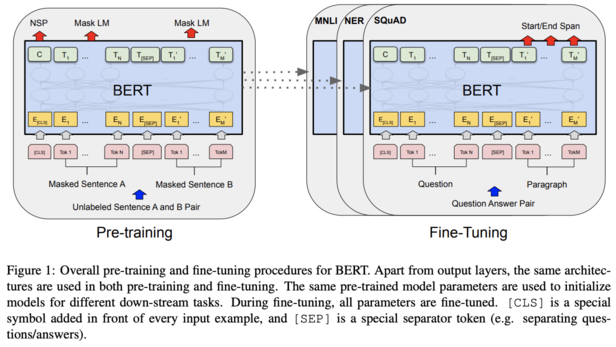

 (https://arxiv.org/abs/1810.04805)

# **SQuAD**

**Stanford Question Answering Dataset** (SQuAD) is a reading comprehension dataset, consisting of questions posed by crowdworkers on a set of Wikipedia articles, where the answer to every question is a segment of text, or span, from the corresponding reading passage, or the question might be unanswerable.

Each Question and answer is accompanied by the context. The context is used to determine an answer to the question.

**SQuAD2.0** combines the 100,000 questions in SQuAD1.1 with over 50,000 unanswerable questions written adversarially by crowdworkers to look similar to answerable ones




source: https://rajpurkar.github.io/SQuAD-explorer/


## **Training bert-base-uncased with SQuAD.**

The bert-base-uncased model was trained with an MLM objective. We will be using this pre-trained model to handle questions answering. We will be using the Stanford Question Answering Dataset (SQuAD) for training our model.

Source: https://github.com/huggingface/transformers/tree/master/examples/question-answering

In [ ]:
# Training took ~6 hours. Latest checkpoint is ~1.5gb.

"""
OUTPUT_DIR = "./checkpoint"

!python ./run_qa.py \
  --model_name_or_path bert-base-uncased \
  --dataset_name squad \
  --do_train \
  --do_eval \
  --per_device_train_batch_size 12 \
  --learning_rate 3e-5 \
  --num_train_epochs 2 \
  --max_seq_length 384 \
  --doc_stride 128 \
  --output_dir OUTPUT_DIR

"""

#Note: you may run out of disk space, so delete the old checkpoint files regularly.

## Training Results

Training took roughly 5-6 hours to complete. Below you can access the checkpoint from which you can test the model yourself.


Exercise: Change the context and come up with your own questions. 

In [ ]:
# # Load the model
# model = BertForQuestionAnswering.from_pretrained('./checkpoint-14500/')
# tokenizer = BertTokenizer.from_pretrained("./checkpoint-14500/", return_token_type_ids = True)

# #Setup nlp pipeline to use the model
# nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)


In [ ]:
# Let us load the pretrained model

model = BertForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

tokenizer = BertTokenizer.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad", return_token_type_ids = True)

#Setup nlp pipeline to use the model
nlp = pipeline("question-answering", model=model, tokenizer=tokenizer)


In [ ]:
questions = [
    "Who is the president of USA?",
    "What is the temperature today?",
    "What is the temperature of airpod today?",
    "What is Airpod Max?",
    "What are Airpods?",
    "Who developed airpods?",
    "What chip does the airpod use?",
    "When was the airpods first released?",
    "When was the 2nd generation airpods released?",
    "What are the features of the 2nd generation airpods?",
    "How many airpods were sold in 2017?",
    "How many airpods were sold in 2018?",
    "How many airpods were sold in 2019?",
    "Which year did Apple sell 60 million airpods?",
    "How big is airpod's marketshare?",
    "How much of Airpod's revenues comes from replacements?"
]

In [ ]:
context="""AirPods are wireless Bluetooth earbuds created by Apple. They were first released on December 13, 2016, with a 
  2nd generation released in March 2019. They are Apple's entry-level wireless headphones, sold alongside AirPods 
  Pro, higher-end wireless earbuds, and AirPods Max, wireless over-ear headphones. Within two years, they became 
  Apple's most popular accessory, turning into a critical success and viral sensation.
  
  In addition to playing audio, AirPods feature a built-in microphone that filters out background noise, which 
  allows phone calls and talking to Apple's digital assistant, Siri. Additionally, built-in accelerometers and 
  optical sensors can detect taps (e.g. double-tap to pause audio) and in-ear placement, which enables automatic 
  pausing when they are taken out of the ears.

  On March 20, 2019, Apple released the 2nd generation AirPods, which feature the H1 chip, longer talk time, and 
  hands-free "Hey Siri" support. An optional wireless charging case was added in the offerings.

  Analysts estimate Apple sold between 14 million and 16 million AirPods in 2017. In 2018, AirPods were 
  Apple's most popular accessory product, with 35 million units sold. 60 million units were sold in 
  2019.[39] Analysts estimate AirPods make up 60% of the global wireless headphone market and that Apple’s 
  entire Wearables products (Apple Watch, AirPods, and AirPods Pro) “is now bigger than 60% of the companies 
  in the Fortune 500”. An estimated 5-7% of Apple's revenue from AirPods comes from replacement 
  earbuds and cases.
  """

In [ ]:
# results = wiki.search(question)
# page = wiki.page(results[0])
# context = ' '.join(page.content.split())

# print(f"Context: {context}")

In [ ]:
for question in questions:
    print(f"Question: {question}")
    print(f"Answer (Bert): {nlp(question=question, context=context)}\n")
    print()

### Exercise: 
Set a threshold for filtering out anwers for irrelevant questions (and ofcourse incorrect answers)

### Exercise: 
Checkout the squad dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset("squad")


In [ ]:
dataset['validation'][105]

In [ ]:
# Load the model from https://huggingface.co/models
PRETRAINED_MODEL = 'deepset/roberta-base-squad2'

model = AutoModelForQuestionAnswering.from_pretrained(PRETRAINED_MODEL)
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_MODEL, return_token_type_ids = True)

#Setup nlp pipeline to use the model
nlp = pipeline('question-answering', model=model, tokenizer=tokenizer)


### Exercise: 

Use the above 'question-answering' pipeline (which uses Roberta model), set the threshold for the same questions and compare with the BERT model.

### Exercise: 
Use a different pretrained model from https://huggingface.co/models

hint: distilbert-base-uncased-distilled-squad

### Exercise (future experiment): 

Finetune BertForQuestionAnswering model with data specific to your domain.  You have to create the training dataset in SQuAD format.
